# Occupazione della stanza

Per prima cosa iniziamo a recuperare il dataset

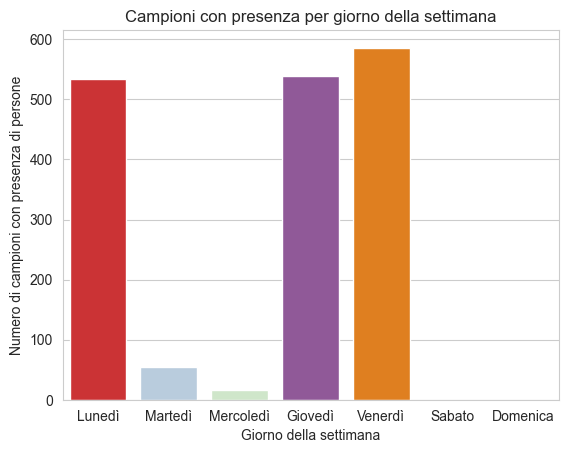

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv('./data/datatraining.txt')

X['date'] = pd.to_datetime(X['date'], format='mixed')
X['weekday'] = X['date'].dt.day_name()
mapping = {
    'Monday':'Lunedì','Tuesday':'Martedì','Wednesday':'Mercoledì',
    'Thursday':'Giovedì','Friday':'Venerdì','Saturday':'Sabato','Sunday':'Domenica'
}
order = ['Lunedì','Martedì','Mercoledì','Giovedì','Venerdì','Sabato','Domenica']
X['weekday'] = X['weekday'].map(mapping)

counts = X.groupby('weekday')['Occupancy'].sum()

palette_saturated = [
    '#e41a1c',  # rosso
    '#377eb8',  # blu
    '#4daf4a',  # verde
    '#984ea3',  # viola
    '#ff7f00',  # arancio
    '#ffff33',  # giallo
    '#a65628'   # marrone
]

# Palette 2: colori non saturi / pastellati (soft, meno contrasto cromatico ma distinti per tonalità)
palette_pastel = [
    '#fbb4ae',  # rosa chiaro
    '#b3cde3',  # azzurro chiaro
    '#ccebc5',  # verde chiaro
    '#decbe4',  # lilla chiaro
    '#fed9a6',  # pesca chiaro
    '#ffffcc',  # giallo pallido
    '#e5d8bd'   # beige chiaro
]

# Palette 3: colori scuri (contrasto per background chiaro, buoni per elementi pesanti)
palette_dark = [
    '#08306b',  # blu scuro
    '#00441b',  # verde scuro
    '#67000d',  # rosso scuro
    '#4a1486',  # viola scuro
    '#8c2d04',  # arancio scuro / marrone
    '#253494',  # indaco scuro
    '#2b2b2b'   # grigio scuro
]

highlight_days = ['Lunedì','Giovedì', 'Venerdì']

colors_map = {
    day: (palette_saturated[i] if day in highlight_days else palette_pastel[i])
    for i, day in enumerate(order)
}

sns.barplot(x=counts.index, y=counts.values, order=order, hue=counts.index, palette=colors_map)
plt.xlabel('Giorno della settimana')
plt.ylabel('Numero di campioni con presenza di persone')
plt.title('Campioni con presenza per giorno della settimana')
plt.show()